# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Santiago Escutia Ríos   |
| **Fecha**      | 3/2/2026  |
| **Expediente** |  757839 |

## Regresión polinomial

Observa la siguiente gráfica.

In [17]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [19]:
from sklearn.linear_model import LinearRegression

X_R = x.reshape(-1, 1) 

modelo = LinearRegression()

modelo.fit(X_R, y)

y_pred = modelo.predict(X_R)

beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print(f"Ecuación= {beta_0:.2f} + {beta_1:.2f}x")

Ecuación= 13.30 + -0.05x


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

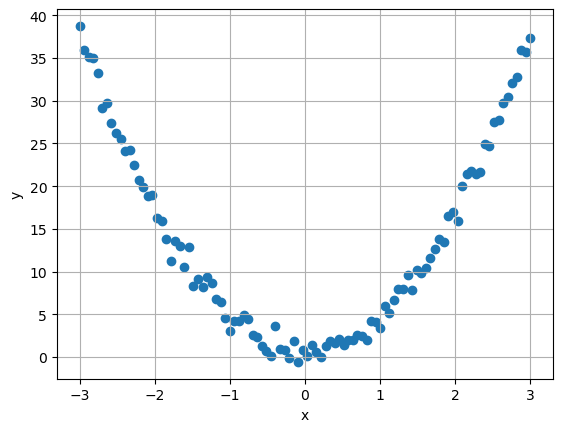

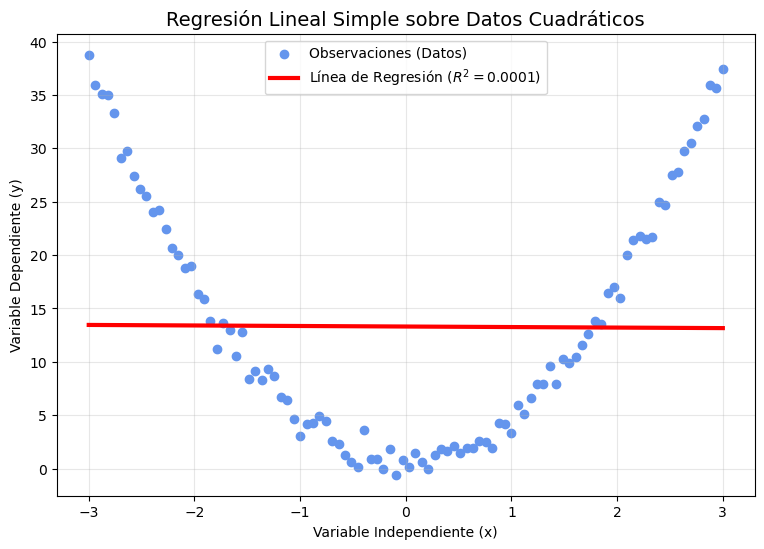

El coeficiente de determinación R² es: 5.80345273922811e-05


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)


X_2D = x.reshape(-1, 1) 
modelo = LinearRegression()
modelo.fit(X_2D, y)
y_pred = modelo.predict(X_2D)

r2 = r2_score(y, y_pred)


plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='cornflowerblue', label='Observaciones (Datos)')
plt.plot(x, y_pred, color='red', linewidth=3, label=f'Línea de Regresión ($R^2 = {r2:.4f}$)')

plt.title('Regresión Lineal Simple sobre Datos Cuadráticos', fontsize=14)
plt.xlabel('Variable Independiente (x)')
plt.ylabel('Variable Dependiente (y)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"El coeficiente de determinación R² es: {r2}")

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)


X_input = x.reshape(-1, 1)


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_input)


modelo_quad = LinearRegression()
modelo_quad.fit(X_poly, y)

y_pred = modelo_quad.predict(X_poly)
r2 = r2_score(y, y_pred)


b0 = modelo_quad.intercept_
b1 = modelo_quad.coef_[1]
b2 = modelo_quad.coef_[2]


print(f"Ecuación: y = {b0:.4f} + ({b1:.4f})x + ({b2:.4f})x²")
print(f"R²: {r2:.4f}")

Ecuación: y = 0.6194 + (-0.0496)x + (4.1439)x²
R²: 0.9934


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

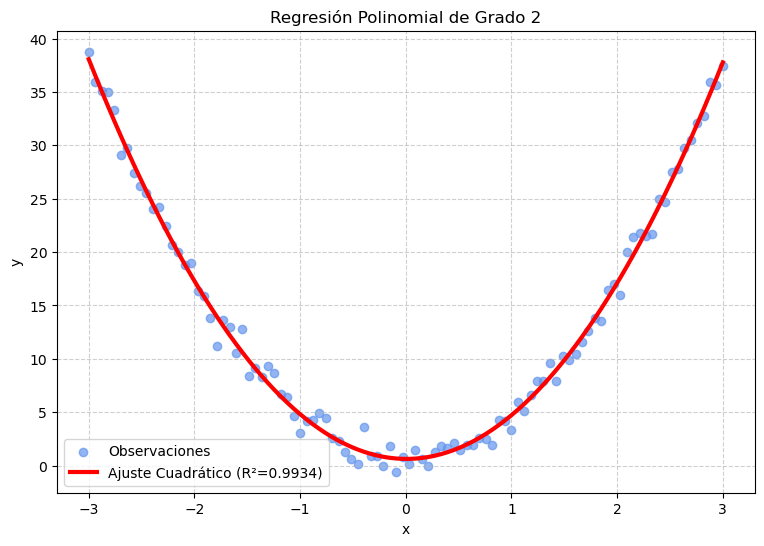

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)


X_input = x.reshape(-1, 1)


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_input)


modelo_quad = LinearRegression()
modelo_quad.fit(X_poly, y)

y_pred = modelo_quad.predict(X_poly)
r2 = r2_score(y, y_pred)


b0 = modelo_quad.intercept_
b1 = modelo_quad.coef_[1]
b2 = modelo_quad.coef_[2]


plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='cornflowerblue', alpha=0.7, label='Observaciones')
plt.plot(x, y_pred, color='red', linewidth=3, label=f'Ajuste Cuadrático (R²={r2:.4f})')
plt.title('Regresión Polinomial de Grado 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


X_input = x.reshape(-1, 1)

grados = [3, 5, 7, 9, 11]

print(f"{'Grado':<10} | {'R² Score':<10}")
print("-" * 25)

for g in grados:
    
    poly = PolynomialFeatures(degree=g)
    X_poly = poly.fit_transform(X_input)
    
    
    model = LinearRegression().fit(X_poly, y)
    
    
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    
    print(f"Grado {g:<5} | {r2:.6f}")

Grado      | R² Score  
-------------------------
Grado 3     | 1.000000
Grado 5     | 1.000000
Grado 7     | 1.000000
Grado 9     | 1.000000
Grado 11    | 1.000000


Crea una gráfica por cada modelo con las observaciones y su curva.

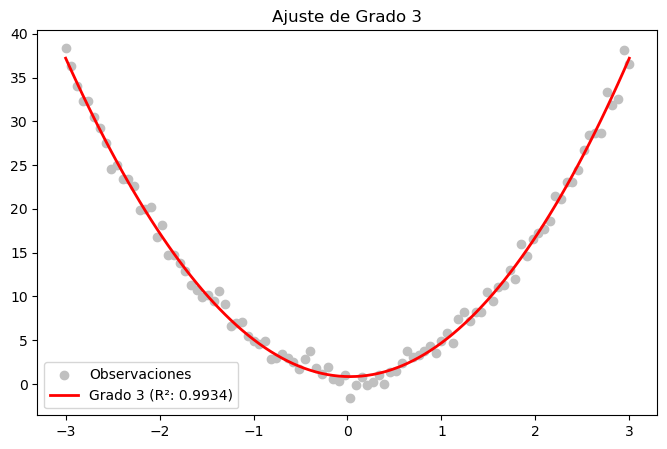

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

plt.clf() 
plt.close('all')


x_clean = np.linspace(-3, 3, 100)
y_clean = 1 + 4*x_clean**2 + np.random.normal(0, 1, 100)
X_input = x_clean.reshape(-1, 1)

poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_input)
model3 = LinearRegression().fit(X_poly3, y_clean)
y_pred3 = model3.predict(X_poly3)


plt.figure(figsize=(8, 5))
plt.scatter(x_clean, y_clean, color='silver', label='Observaciones')
plt.plot(x_clean, y_pred3, color='red', linewidth=2, label=f'Grado 3 (R²: {r2_score(y_clean, y_pred3):.4f})')
plt.title("Ajuste de Grado 3")
plt.legend()
plt.show()

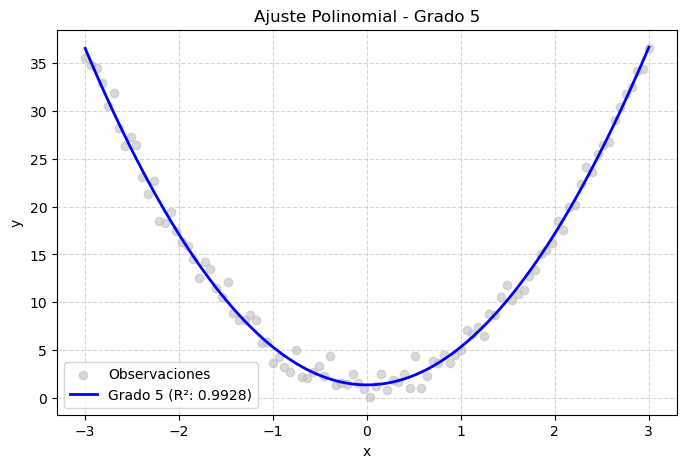

R² para Grado 5: 0.992783


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


plt.close('all')

x_clean = np.linspace(-3, 3, 100)
y_clean = 1 + 4*x_clean**2 + np.random.normal(0, 1, 100)
X_input = x_clean.reshape(-1, 1)


grado = 5
poly5 = PolynomialFeatures(degree=grado)
X_poly5 = poly5.fit_transform(X_input)
model5 = LinearRegression().fit(X_poly5, y_clean)
y_pred5 = model5.predict(X_poly5)


plt.figure(figsize=(8, 5))
plt.scatter(x_clean, y_clean, color='silver', alpha=0.6, label='Observaciones')

plt.plot(x_clean.ravel(), y_pred5.ravel(), color='blue', linewidth=2, 
         label=f'Grado 5 (R²: {r2_score(y_clean, y_pred5):.4f})')

plt.title(f"Ajuste Polinomial - Grado {grado}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"R² para Grado 5: {r2_score(y_clean, y_pred5):.6f}")

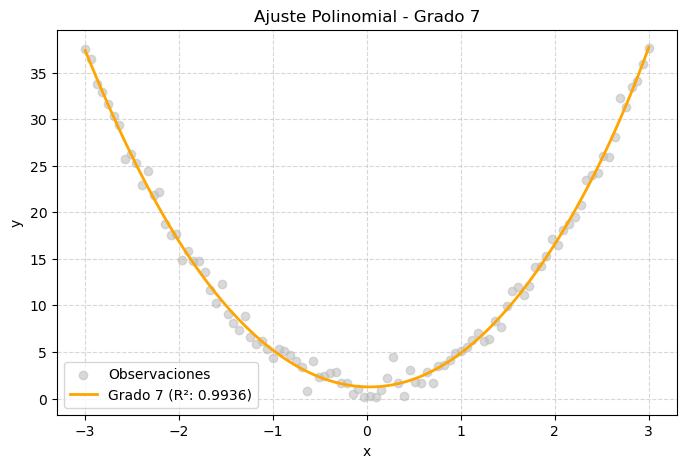

R² para Grado 7: 0.993581


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


plt.close('all')


x_clean = np.linspace(-3, 3, 100)
y_clean = 1 + 4*x_clean**2 + np.random.normal(0, 1, 100)
X_input = x_clean.reshape(-1, 1)


grado = 7
poly7 = PolynomialFeatures(degree=grado)
X_poly7 = poly7.fit_transform(X_input)
model7 = LinearRegression().fit(X_poly7, y_clean)
y_pred7 = model7.predict(X_poly7)

plt.figure(figsize=(8, 5))
plt.scatter(x_clean, y_clean, color='silver', alpha=0.6, label='Observaciones')


plt.plot(x_clean.ravel(), y_pred7.ravel(), color='orange', linewidth=2, 
         label=f'Grado 7 (R²: {r2_score(y_clean, y_pred7):.4f})')

plt.title(f"Ajuste Polinomial - Grado {grado}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


print(f"R² para Grado 7: {r2_score(y_clean, y_pred7):.6f}")

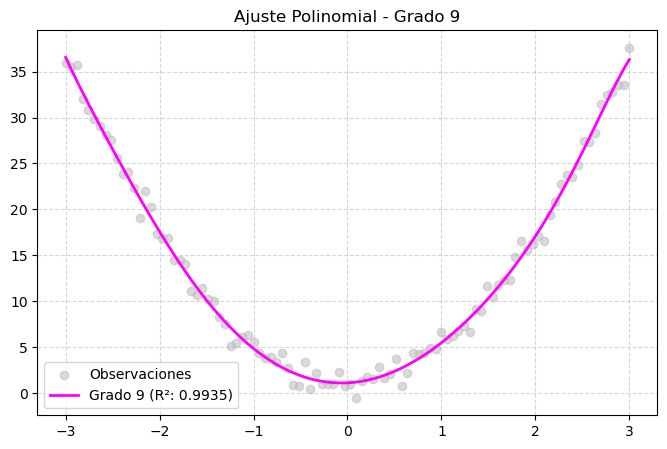

R² para Grado 9: 0.993492


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


plt.close('all')


x_clean = np.linspace(-3, 3, 100)
y_clean = 1 + 4*x_clean**2 + np.random.normal(0, 1, 100)
X_input = x_clean.reshape(-1, 1)


grado = 9
poly9 = PolynomialFeatures(degree=grado)
X_poly9 = poly9.fit_transform(X_input)
model9 = LinearRegression().fit(X_poly9, y_clean)
y_pred9 = model9.predict(X_poly9)


plt.figure(figsize=(8, 5))
plt.scatter(x_clean, y_clean, color='silver', alpha=0.6, label='Observaciones')
plt.plot(x_clean.ravel(), y_pred9.ravel(), color='magenta', linewidth=2, 
         label=f'Grado 9 (R²: {r2_score(y_clean, y_pred9):.4f})')

plt.title(f"Ajuste Polinomial - Grado {grado}")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"R² para Grado 9: {r2_score(y_clean, y_pred9):.6f}")

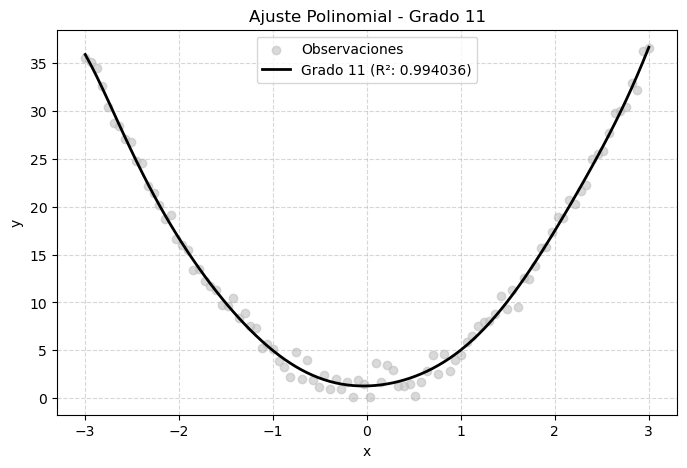

R² para Grado 11: 0.994036


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

plt.close('all')


x_clean = np.linspace(-3, 3, 100)
y_clean = 1 + 4*x_clean**2 + np.random.normal(0, 1, 100)
X_input = x_clean.reshape(-1, 1)


grado = 11
poly11 = PolynomialFeatures(degree=grado)
X_poly11 = poly11.fit_transform(X_input)
model11 = LinearRegression().fit(X_poly11, y_clean)
y_pred11 = model11.predict(X_poly11)

plt.figure(figsize=(8, 5))
plt.scatter(x_clean, y_clean, color='silver', alpha=0.6, label='Observaciones')


plt.plot(x_clean.ravel(), y_pred11.ravel(), color='black', linewidth=2, 
         label=f'Grado 11 (R²: {r2_score(y_clean, y_pred11):.6f})')

plt.title(f"Ajuste Polinomial - Grado {grado}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. Resultado numérico
print(f"R² para Grado 11: {r2_score(y_clean, y_pred11):.6f}")

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El de grado 2 y 3 porque son los que mejor se ajustan, lo que pasa es que uno normalmente se fijaría en en el $R^2$ pero este esta sesgado a favor de los modelos más complejos como el de grado 11 que ya son muy cercanos a 1, pero esto añade una dificultad innecesaria , los de grado 2 y 3 son los que que menos se devían, además que el de grado 2 es literalmente una parábola.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


x_train = np.linspace(-3, 3, 100).reshape(-1, 1)
y_train = 1 + 4*x_train**2 + np.random.normal(0, 1, 100).reshape(-1, 1)


poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(x_train)
model2 = LinearRegression().fit(X_poly2, y_train)

y_pred_5_g2 = model2.predict(poly2.transform([[5]]))
print(f"Predicción Grado 2 para x=5: {y_pred_5_g2[0][0]:.4f}")

Predicción Grado 2 para x=5: 100.6436


In [62]:

poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(x_train)
model3 = LinearRegression().fit(X_poly3, y_train)

y_pred_5_g3 = model3.predict(poly3.transform([[5]]))
print(f"Predicción Grado 3 para x=5: {y_pred_5_g3[0][0]:.4f}")

Predicción Grado 3 para x=5: 97.6519


In [50]:
poly5 = PolynomialFeatures(degree=5)
X_poly5 = poly5.fit_transform(x_train)
model5 = LinearRegression().fit(X_poly5, y_train)

y_pred_5_g5 = model5.predict(poly5.transform([[5]]))
print(f"Predicción Grado 5 para x=5: {y_pred_5_g5[0][0]:.4f}")

Predicción Grado 5 para x=5: 114.9807


In [51]:
poly7 = PolynomialFeatures(degree=7)
X_poly7 = poly7.fit_transform(x_train)
model7 = LinearRegression().fit(X_poly7, y_train)

y_pred_5_g7 = model7.predict(poly7.transform([[5]]))
print(f"Predicción Grado 7 para x=5: {y_pred_5_g7[0][0]:.4f}")

Predicción Grado 7 para x=5: 155.6666


In [52]:
poly9 = PolynomialFeatures(degree=9)
X_poly9 = poly9.fit_transform(x_train)
model9 = LinearRegression().fit(X_poly9, y_train)

y_pred_5_g9 = model9.predict(poly9.transform([[5]]))
print(f"Predicción Grado 9 para x=5: {y_pred_5_g9[0][0]:.4f}")

Predicción Grado 9 para x=5: 1976.2567


In [53]:
poly11 = PolynomialFeatures(degree=11)
X_poly11 = poly11.fit_transform(x_train)
model11 = LinearRegression().fit(X_poly11, y_train)

y_pred_5_g11 = model11.predict(poly11.transform([[5]]))
print(f"Predicción Grado 11 para x=5: {y_pred_5_g11[0][0]:.4f}")

Predicción Grado 11 para x=5: -4978.5237


¿Cuál modelo crees que sea mejor?

Ya con esta información se reafiorma que los mejores son los de grado 2 y 3 porque son los cercanos a 100, pero el ganador es el de grado 2, s eve a partir de los grados 9 y 11 (los más altos) dan números exagerados que nada que ver con las muestra y esto básica,nete pasa porque el modelo no aprendió bien solo imita los valores de la muestra.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3